# **Introdução a Análise de Dados em Python**
`WANDA 2023`

### **Ministrante:** Ednael Vieira
  - MBA Ciência de Dados (Projeto CIn/Samsung)
  - Msc Engenharia de Produção (PPGEP)

<img src="ds.png" alt="alt text" width="70%" height="auto" class="blog-image">

# ETAPAS
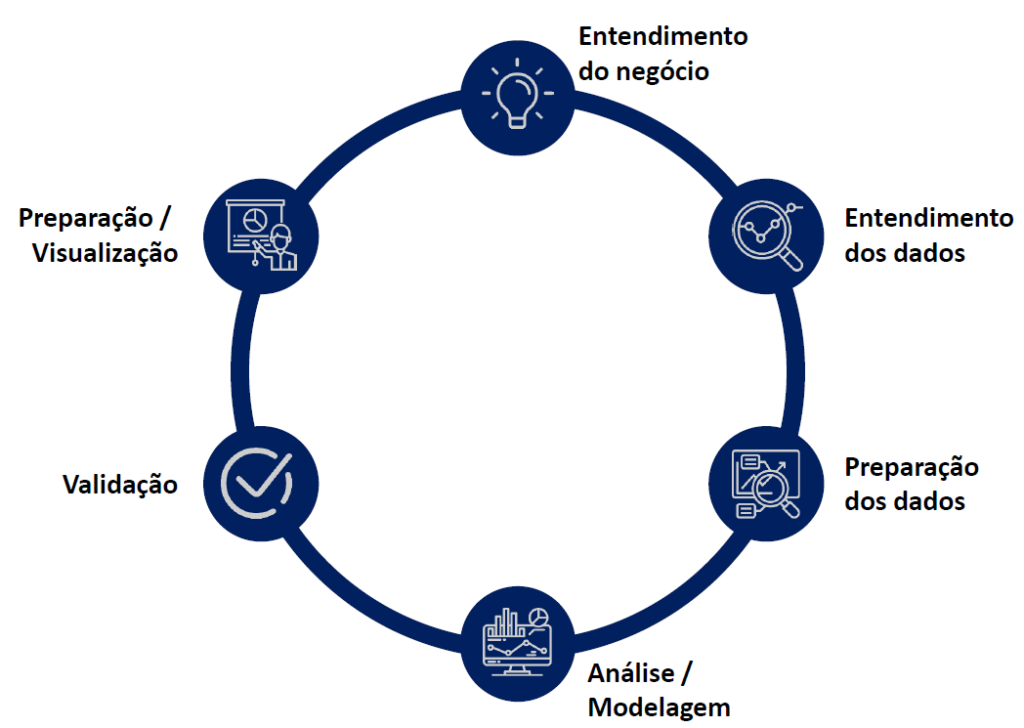

# **Fase 1: Problema de pesquisa**
- O que desejamos compreender ou que resultados desejamos obter?
- Qual caminho desejamos traçar para obtenção destes resultados, ou o que desejamos fazer com estes resultados?


## Problema de pesquisa: Quais fatores influenciam a qualidade do sono das pessoas de maneira geral?

- Existem grupos de pessoas que são mais propensas a terem disturbios no seu sono? Quais são essas pessoas
- Será que homens ou mulheres tendem a ter dificuldades ao dormir?
- A profissão de uma pessoa pode influir na qualidade do seu sono?
- O estilo de vida sedentário ou não influi na qualidade do sono das pessoas, de maneira geral?

# Fase 2: Entendimento dos dados

- Nome do dataset:
- Fonte:
- Autores:
- Link:


Atributos do dataset:


## Importação

<img src="qr_dados.png" alt="alt text" width="50%" height="auto" class="blog-image">
<b> https://drive.google.com/file/d/1l7Qs1F2mD8qyx8oM2Vmpn1q5vLIhZ6il/view?usp=drive_link <b/>

In [ ]:
!pip install plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# importação direto do repositório online
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv',index_col=[0])

In [9]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [14]:
df['Occupation'].value_counts(normalize=True)

Nurse                   0.195187
Doctor                  0.189840
Engineer                0.168449
Lawyer                  0.125668
Teacher                 0.106952
Accountant              0.098930
Salesperson             0.085561
Software Engineer       0.010695
Scientist               0.010695
Sales Representative    0.005348
Manager                 0.002674
Name: Occupation, dtype: float64

## Visão geral sobre os dados

- Visão tabulada 
- Busca por dados faltantes
- Busca por outliers
- Estudo de correlações

### `Visão tabulada`

In [ ]:
df

In [15]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


### `Busca por faltantes`

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [19]:
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [20]:
df['Daily Steps'].value_counts()
#normalize=True, ascending=True

8000     101
6000      68
5000      68
7000      66
10000     36
5500       4
3000       3
3500       3
4000       3
6800       3
4800       2
7300       2
7500       2
4200       2
3300       2
5600       2
5200       2
4100       2
3700       2
6200       1
Name: Daily Steps, dtype: int64

In [21]:
df['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

### `Correlações`

Teste de correlação de Pearson (também possível configurar o teste de Spearman e KM)

In [22]:
df.corr()

C:\Users\ednae\AppData\Local\Temp\ipykernel_9580\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


Visualização em Heatmap

In [23]:
!pip install seaborn

In [24]:
import seaborn as sns

In [27]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [28]:
df_num = df.drop(['Gender','Occupation','BMI Category','Blood Pressure',
                 'Sleep Disorder'],axis=1)

In [33]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [29]:
df_num

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,,,,,,,
1,27,6.1,6,42,6,77,4200
2,28,6.2,6,60,8,75,10000
3,28,6.2,6,60,8,75,10000
4,28,5.9,4,30,8,85,3000
5,28,5.9,4,30,8,85,3000
...,...,...,...,...,...,...,...
370,59,8.1,9,75,3,68,7000
371,59,8.0,9,75,3,68,7000
372,59,8.1,9,75,3,68,7000


<Axes: >

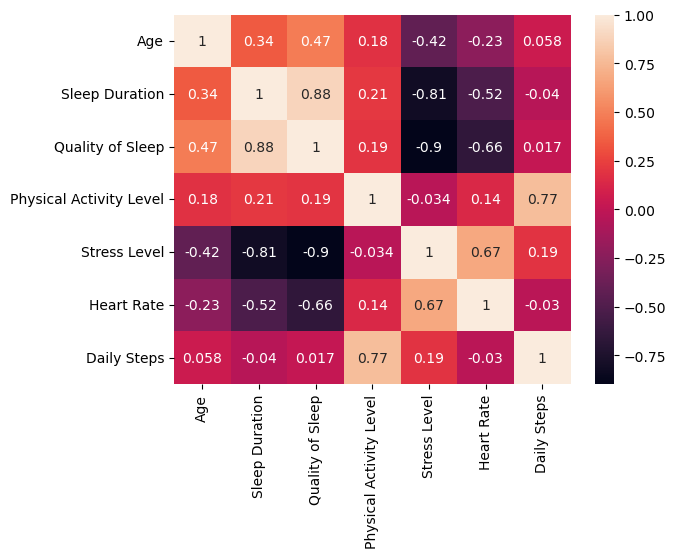

In [34]:
sns.heatmap(df_num.corr(),annot=True)

In [ ]:
# Usando pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="Profiling Report")

In [ ]:
df.columns

### Gráficos de análise, inicias
- BoxPlot
- Histograma

<Axes: >

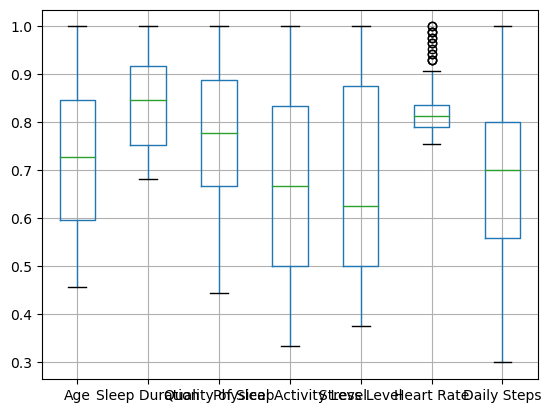

In [42]:
df_num.boxplot()

### Ajuste dos dados numéricos

In [52]:
df_num = df.drop(['Occupation','Gender','BMI Category','Sleep Disorder','Blood Pressure'],axis=1)

In [ ]:
df_num

In [39]:
for coluna in df_num:
    df_num[coluna] = df_num[coluna] / df_num[coluna].max()

In [40]:
df_num

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,,,,,,,
1,0.457627,0.717647,0.666667,0.466667,0.750,0.895349,0.42
2,0.474576,0.729412,0.666667,0.666667,1.000,0.872093,1.00
3,0.474576,0.729412,0.666667,0.666667,1.000,0.872093,1.00
4,0.474576,0.694118,0.444444,0.333333,1.000,0.988372,0.30
5,0.474576,0.694118,0.444444,0.333333,1.000,0.988372,0.30
...,...,...,...,...,...,...,...
370,1.000000,0.952941,1.000000,0.833333,0.375,0.790698,0.70
371,1.000000,0.941176,1.000000,0.833333,0.375,0.790698,0.70
372,1.000000,0.952941,1.000000,0.833333,0.375,0.790698,0.70


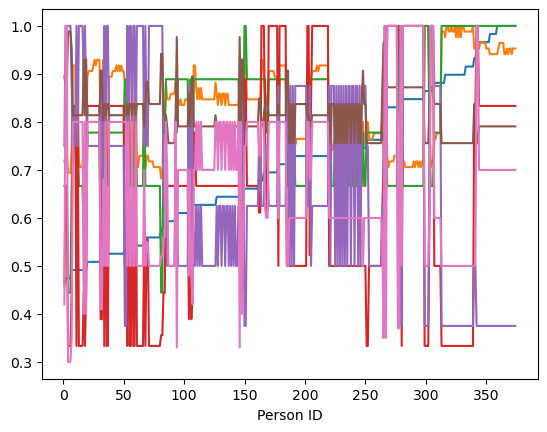

In [44]:
for coluna in df_num:
    df_num[coluna].plot()

In [45]:
import matplotlib.pyplot as plt

[Text(1, 0, 'Age'),
 Text(2, 0, 'Sleep Duration'),
 Text(3, 0, 'Quality of Sleep'),
 Text(4, 0, 'Physical Activity Level'),
 Text(5, 0, 'Stress Level'),
 Text(6, 0, 'Heart Rate'),
 Text(7, 0, 'Daily Steps')]

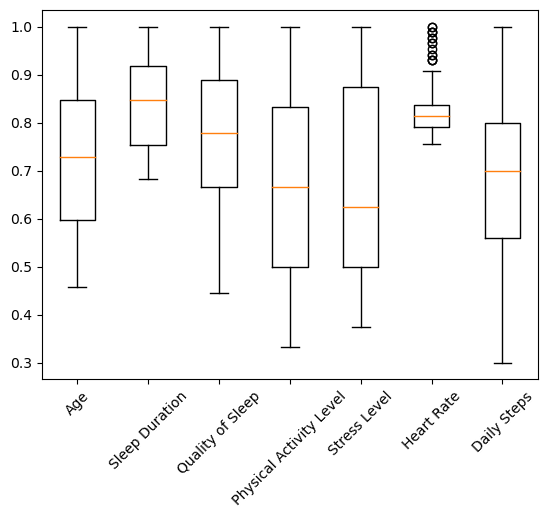

In [48]:
fig, ax = plt.subplots()
ax.boxplot(df_num)
ax.set_xticklabels(df_num.columns ,rotation=45)
#fig.set_size_inches(16.5, 6.5, forward=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Sleep Duration'),
  Text(2, 0, 'Quality of Sleep'),
  Text(3, 0, 'Physical Activity Level'),
  Text(4, 0, 'Stress Level'),
  Text(5, 0, 'Heart Rate'),
  Text(6, 0, 'Daily Steps')])

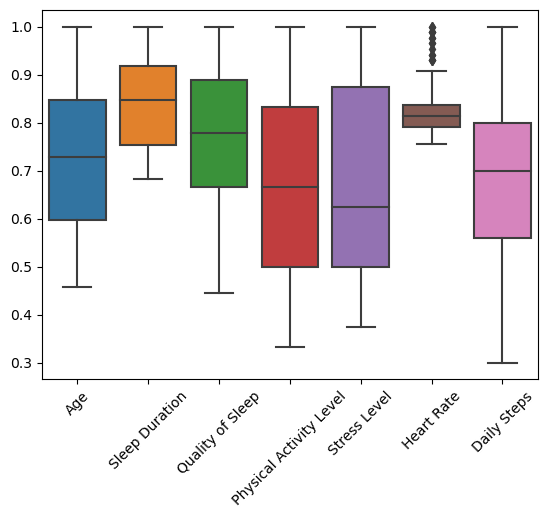

In [50]:
#plt.figure(figsize=(16,6))
sns.boxplot(df_num)
plt.xticks(rotation=45)

# Análises Cruzadas

<Axes: xlabel='Stress Level', ylabel='Age'>

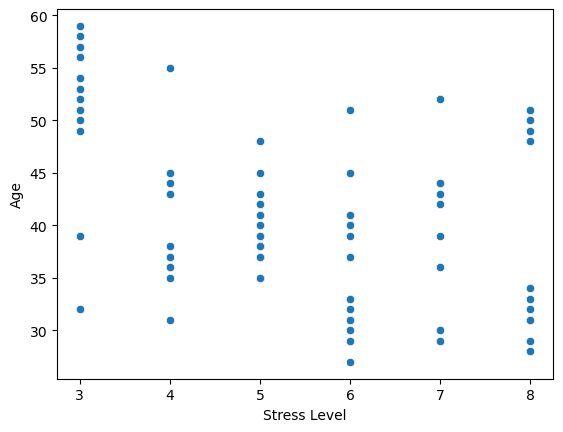

In [53]:
sns.scatterplot(x=df_num['Stress Level'],y=df_num['Age'])

<Axes: xlabel='Stress Level', ylabel='Age'>

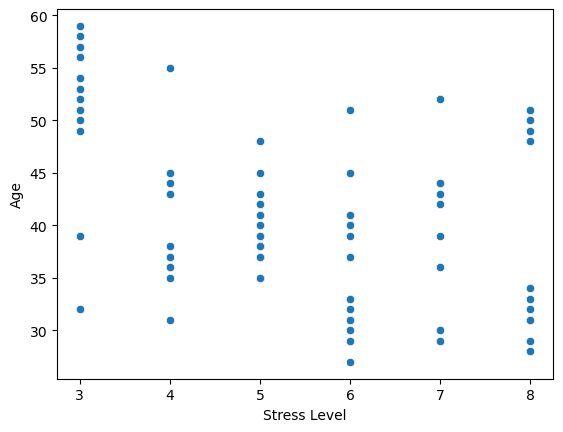

In [54]:
sns.scatterplot(x=df['Stress Level'],y=df['Age'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Software Engineer'),
  Text(1, 0, 'Doctor'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Teacher'),
  Text(4, 0, 'Nurse'),
  Text(5, 0, 'Engineer'),
  Text(6, 0, 'Accountant'),
  Text(7, 0, 'Scientist'),
  Text(8, 0, 'Lawyer'),
  Text(9, 0, 'Salesperson'),
  Text(10, 0, 'Manager')])

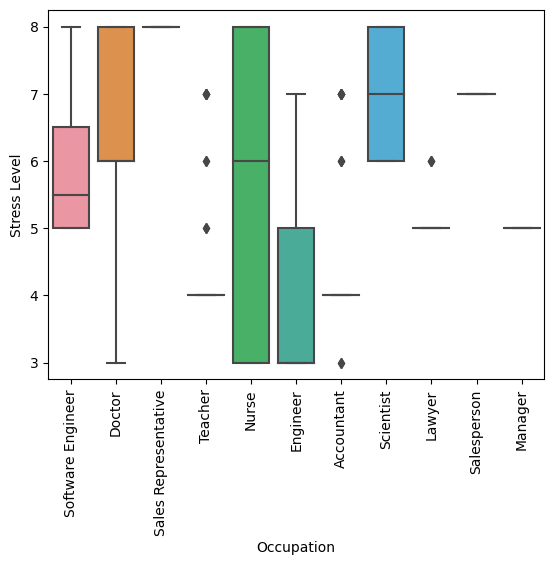

In [61]:
sns.boxplot(y=df['Stress Level'],x=df['Occupation'])
plt.xticks(rotation=90)

# Questionamento levantados:

- Existem grupos de pessoas que são mais propensas a terem disturbios no seu sono? Quais são essas pessoas
- Será que homens ou mulheres tendem a ter dificuldades ao dormir?
- A profissão de uma pessoa pode influir na qualidade do seu sono?
- O estilo de vida sedentário ou não influi na qualidade do sono das pessoas, de maneira geral?

#### a.`Será que homens tendem a ter mais dificuldade com sono, ou as mulheres?`

In [62]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='Stress Level'>

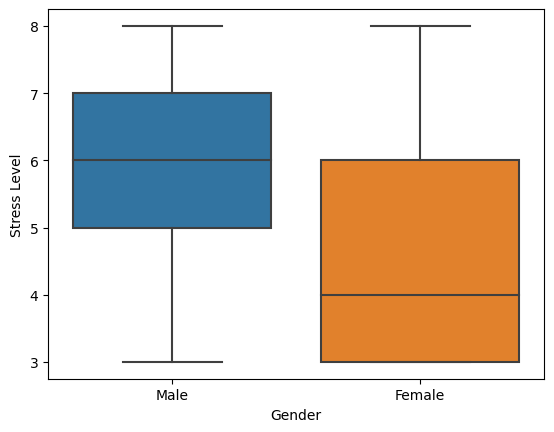

In [63]:
sns.boxplot(y=df['Stress Level'],x=df['Gender'])

`Tem como enriquecer mais essa informação?`

#### `A profissão de uma pessoa pode influir na qualidade do seu sono?`

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Software Engineer'),
  Text(1, 0, 'Doctor'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Teacher'),
  Text(4, 0, 'Nurse'),
  Text(5, 0, 'Engineer'),
  Text(6, 0, 'Accountant'),
  Text(7, 0, 'Scientist'),
  Text(8, 0, 'Lawyer'),
  Text(9, 0, 'Salesperson'),
  Text(10, 0, 'Manager')])

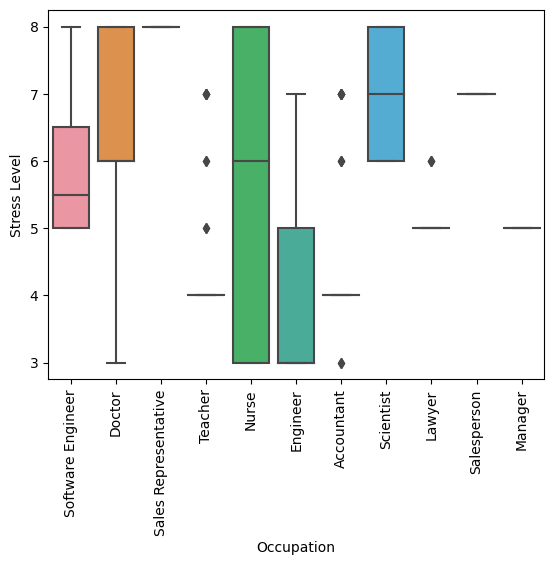

In [64]:
sns.boxplot(y=df['Stress Level'],x=df['Occupation'])
plt.xticks(rotation=90)

Quantos Vendedores existem na base?

In [66]:
df['Occupation'].value_counts(normalize=True)

Nurse                   0.195187
Doctor                  0.189840
Engineer                0.168449
Lawyer                  0.125668
Teacher                 0.106952
Accountant              0.098930
Salesperson             0.085561
Software Engineer       0.010695
Scientist               0.010695
Sales Representative    0.005348
Manager                 0.002674
Name: Occupation, dtype: float64

Como se comportam os demais dados sobre os vendedores? Será que outro fator pode influenciar mais?

In [67]:
df[df['Occupation']=='Salesperson']

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
178,Male,42,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
188,Male,43,Salesperson,6.3,6,45,7,Overweight,130/85,72,6000,Insomnia
190,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
192,Male,43,Salesperson,6.4,6,45,7,Overweight,130/85,72,6000,Insomnia
193,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
194,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
195,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
196,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
197,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia


O peso parece ser outro padrão a se estudar!!

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Overweight'),
  Text(1, 0, 'Normal'),
  Text(2, 0, 'Obese'),
  Text(3, 0, 'Normal Weight')])

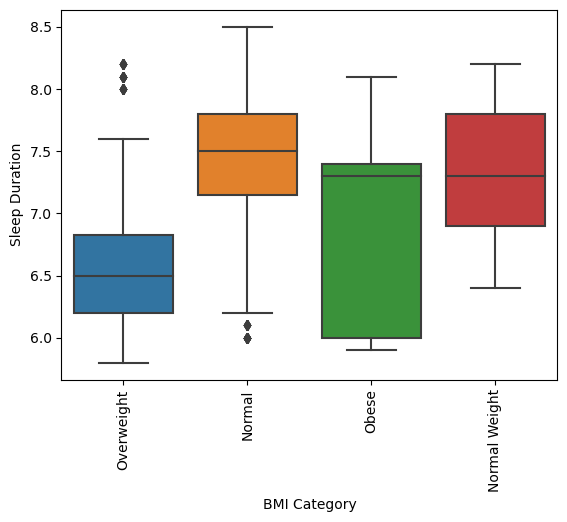

In [68]:
sns.boxplot(y=df['Sleep Duration'],x=df['BMI Category'])
plt.xticks(rotation=90)

# E agora, o que vocês percebem sobre os atributos da base?

In [70]:
!pip install plotly

In [71]:
import plotly

### Aparentemente, análises pareadas não se mostram suficientes para compreensão

![plotly](logo.png)

### Visualização de dados:
- Gráficos Ricos
    - Treemap
    - Parallel Coordinates

In [ ]:
df.columns

In [80]:
problemas = ['None','Sleep Apnea', 'Insomnia']

In [85]:
count = 0
for prob in df['Sleep Disorder']:
    if type(prob) == 'NaN':
        df['Sleep Disorder'][count] = random.choices(problemas)[0]
    count+=1

In [ ]:
df['Sleep Disorder'].fillna('None')

In [84]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [79]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [72]:
import plotly.express as px

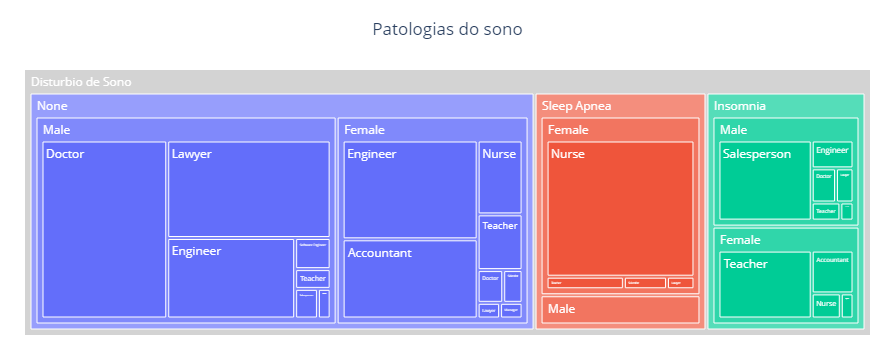

In [87]:
fig = px.treemap(df,path=[px.Constant('Disturbio de Sono'),'Sleep Disorder','Gender','Occupation'],
                        values='Sleep Duration',maxdepth=4)

fig.update_layout(uniformtext_minsize=18)
fig.update_traces(root_color="lightgray",textfont_color='rgb(255,255,255)')

fig.update_layout(
title_text='Patologias do sono',title_x=0.5
                        )
fig.update_layout(margin = dict(t=70, l=25, r=25, b=25))

fig.show()

In [89]:
df['Physical Activity Level']

Person ID
1      42
2      60
3      60
4      30
5      30
       ..
370    75
371    75
372    75
373    75
374    75
Name: Physical Activity Level, Length: 374, dtype: int64

In [88]:
df['Daily Steps'].value_counts()

8000     101
6000      68
5000      68
7000      66
10000     36
5500       4
3000       3
3500       3
4000       3
6800       3
4800       2
7300       2
7500       2
4200       2
3300       2
5600       2
5200       2
4100       2
3700       2
6200       1
Name: Daily Steps, dtype: int64

#### Podemos criar um indicador a partir destas informações? Temos conhecimento do domínio?

In [90]:
df_num.reset_index(drop=False,inplace=True)

In [91]:
df_num.columns

Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')

### LIST COMPREHENTION

In [92]:
list1 = [col for col in df_num.columns]

In [93]:
list1.__len__()

8

In [94]:
a = dict(zip(range(1,9),list1))

In [ ]:
a

C:\Users\ednae\miniconda3\envs\msc\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



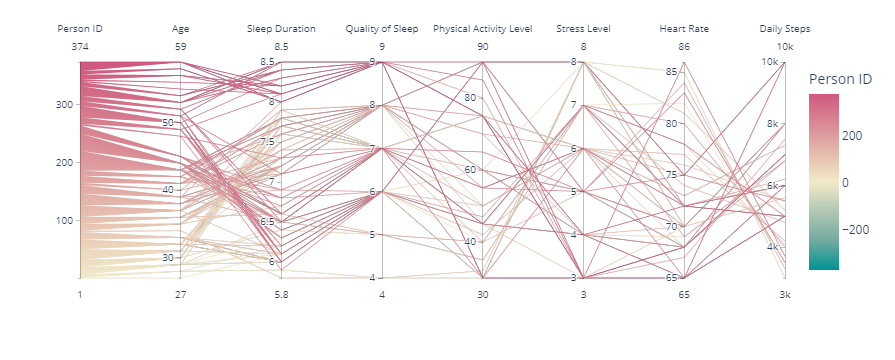

In [95]:
fig = px.parallel_coordinates(df_num, color="Person ID",labels=a,
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

#Electric